In [2]:

import sys

command_str = '{sys.executable} -m pip install --upgrade opml'.format(sys=sys)
print(command_str)
!{command_str}

/opt/conda/bin/python -m pip install --upgrade opml
     |████████████████████████████████| 5.5 MB 2.6 MB/s eta 0:00:01
  Created wheel for opml: filename=opml-0.5-py3-none-any.whl size=3630 sha256=ec8d1c53ca632d6ae13ee89da2e975aee89a806765de06fc80c944aa8153a5ba
  Stored in directory: /home/jovyan/.cache/pip/wheels/4f/03/39/0af4ed154121308f63ae1be1d51a3042cdccfcfdac7588b350
Successfully built opml


In [3]:

import opml

print(['opml.{}'.format(fn) for fn in dir(opml) if not fn.startswith('_')])

['opml.Opml', 'opml.OutlineElement', 'opml.from_string', 'opml.lxml', 'opml.parse']


In [10]:

networth_opml = opml.parse('../data/opml/Net_Worth_by_Date.opml')
print(['networth_opml.{}'.format(fn) for fn in dir(networth_opml) if not fn.startswith('_')])

[]


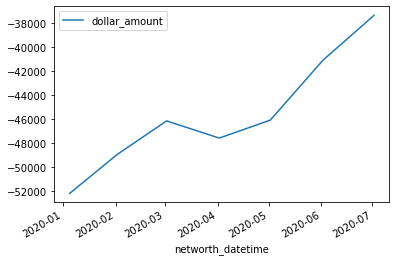

In [32]:

from datetime import datetime
import re
import pandas as pd

format_str = '%A, %B %d, %Y'
rows_list = []
for el in networth_opml:
    row_dict = {}
    date_str = el.text
    networth_datetime = datetime.strptime(date_str, format_str)
    row_dict['networth_datetime'] = networth_datetime
    dollar_str = el._note
    dollar_amount = float(re.sub('[$,]+', '', dollar_str))
    row_dict['dollar_amount'] = dollar_amount
    rows_list.append(row_dict.copy())
networth_df = pd.DataFrame(rows_list)
networth_df.plot.line(x='networth_datetime', y='dollar_amount');